# Tabular Data  

## Using Small MovieLens Dataset

In [1]:
from fastai import *
from fastai.tabular import *

In [2]:
# Read CSV in Pandas
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [3]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [ ]:
# FillMissing: Look for missing values and deal with them some way.
# Categorify: Find categorical variables and turn them into Pandas categories
# Normalize : Do a normalization ahead of time which is to take continuous variables and subtract their mean and divide by their standard deviation so they are zero-one variables.

In [4]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [5]:
# Set-aside Testset
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [ ]:
# Create Databunch

In [6]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test, label=0)
                           .databunch())

In [7]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,11th,Married-civ-spouse,Tech-support,Husband,White,False,-0.9959,-0.0770,-1.2046,<50k
Private,Some-college,Divorced,Machine-op-inspct,Own-child,White,False,0.0303,-1.0338,-0.0312,<50k
Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,False,0.4701,-0.0798,1.9245,>=50k
Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,White,False,-0.7760,0.3310,1.1422,>=50k
Private,12th,Never-married,Other-service,Own-child,White,False,-1.5823,0.7718,-0.8135,<50k
Private,10th,Never-married,Craft-repair,Not-in-family,White,False,-0.7760,0.1403,-1.5958,<50k
Private,Some-college,Separated,Machine-op-inspct,Not-in-family,White,False,-0.0430,-0.8319,-0.0312,>=50k
Self-emp-not-inc,Masters,Married-civ-spouse,Craft-repair,Husband,White,False,0.0303,1.3944,1.5334,>=50k
Private,HS-grad,Widowed,Machine-op-inspct,Unmarried,White,False,2.2292,-0.2342,-0.4224,<50k
Private,Bachelors,Never-married,Adm-clerical,Own-child,White,False,-1.1425,0.2602,1.1422,<50k


In [ ]:
# We're gonna learn what layers= means either towards the end of class today or the start of class next week, 
# but this is where we're basically defining our architecture just like when we chose ResNet 34 or whatever for conv nets

In [8]:
# Create Leaner
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [10]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


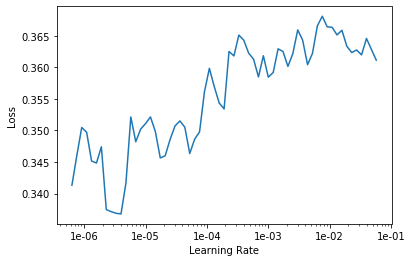

In [11]:
learn.recorder.plot(skip_end=15)

In [12]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.358833,0.371457,0.825000,00:54


In [13]:
learn.fit(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.374552,0.398303,0.820000,00:53
1,0.364174,0.375110,0.835000,00:53
2,0.355115,0.358169,0.840000,00:54
3,0.354921,0.355038,0.845000,00:54
4,0.349953,0.357888,0.850000,00:54
5,0.371041,0.351703,0.850000,00:54
6,0.347867,0.353313,0.845000,00:54
7,0.363351,0.361272,0.855000,00:56
8,0.355437,0.348741,0.850000,00:53
9,0.343979,0.354795,0.840000,00:53


# Collab Data

In [14]:
from fastai import *
from fastai.collab import *
from fastai.tabular import *

In [15]:
user,item,title = 'userId','movieId','title'

In [16]:
path = untar_data(URLs.ML_SAMPLE)
path

WindowsPath('C:/Users/bokhy/.fastai/data/movie_lens_sample')

In [17]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [18]:
# It's very simple compared to Tabular Data
# 1. Create databunch
data = CollabDataBunch.from_df(ratings, seed=623)

In [19]:
# 2. Set the range of the value we want to get (in this case, its' the rating between 0 and 5)
y_range = [0,5.5]

In [20]:
# Create Learner
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [21]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.643990,0.947816,00:44
1,0.850718,0.641777,00:45
2,0.650368,0.641316,00:46


## Using Large MovieLens Dataset

In [41]:
print(Config.data_path())

C:\Users\bokhy\.fastai\data


In [42]:
path=Config.data_path()/'ml-latest'

In [47]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [26]:
# Load Moview Data
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
movies = pd.read_csv(path/'movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [49]:
len(ratings)

27753444

In [50]:
len(movies)

58098

In [51]:
# Merge two datasets by item and title
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,1,307,3.5,1256677221,Three Colors: Blue (Trois couleurs: Bleu) (1993)
1,6,307,4.0,832059248,Three Colors: Blue (Trois couleurs: Bleu) (1993)
2,56,307,4.0,1383625728,Three Colors: Blue (Trois couleurs: Bleu) (1993)
3,71,307,5.0,1257795414,Three Colors: Blue (Trois couleurs: Bleu) (1993)
4,84,307,3.0,999055519,Three Colors: Blue (Trois couleurs: Bleu) (1993)


In [52]:
len(rating_movie)

27753444

In [53]:
# Create Databunch
data = CollabDataBunch.from_df(rating_movie, seed=623, valid_pct=0.1, item_name=title, bs = 24, num_workers = 2)
# we need to tell to use titles as the item name instead of movieID

In [54]:
data.show_batch()

userId,title,target
187135,How to Train Your Dragon (2010),5.0
4507,"Me, Myself & Irene (2000)",1.0
206005,Date Night (2010),3.0
51384,"Hitchhiker's Guide to the Galaxy, The (2005)",4.0
77539,What's Eating Gilbert Grape (1993),5.0


## Tricks for better results (what you should do in learner!)

In [ ]:
#1. IN this case, use Y_range
# Y range was the thing that made the final activation function a sigmoid
# Sigmoid has an asymptote at 5, so, it's impossible to predict 5. But In real, many movies has 5 ratings
# That's why we give a slightly higher end

In [ ]:
#2. Add Weight Decay as wd
# Generally, it should be 0.1 (the default is 0.01)

In [ ]:
# 3. n_factoris the width of the embedding matrix. (You should try 10,20,40,80 or bigger to find the best result)

In [55]:
y_range = [0,5.5]

In [56]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

In [57]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


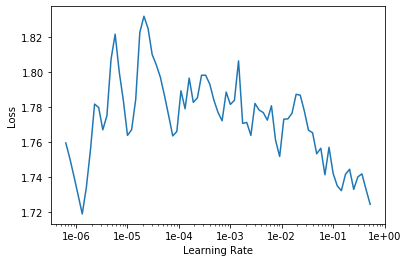

In [58]:
learn.recorder.plot(skip_end=15)
learn.recorder.plot_losses()

In [60]:
learn.fit_one_cycle(5, 1e-1) # only one learning rate not slice(1e-3, 1e-5), because there is only one layer in tabular/collab data

epoch,train_loss,valid_loss,time


KeyboardInterrupt: 

In [ ]:
# We usually want the valid loss less than 0.05

In [ ]:
learn.save('dotprod')

## Interpretation

In [ ]:
learn.load('dotprod');

In [ ]:
learn.model

In [ ]:
# Count the top
g = rating_movie.groupby(title)['rating'].count()
print(g)

In [ ]:
# See Top movies that's rated the most time (not good movies)
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

### Interpreting Movie bias

In [ ]:
# Movie Bias
# We take the learner and look at the bias of the items(movies) in the data

In [ ]:
movie_bias = learn.bias(top_movies, is_item=True) # is_item=False would show the user bias
movie_bias.shape # it should be 1000, as we try to see the bias for 1000 movies

In [ ]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [ ]:
item0 = lambda o:o[0]

In [ ]:
# sort by the bias
# this givs lowest numbers --> not a great movie
sorted(movie_ratings, key=item0)[:15]

In [ ]:
# This gives the highest numbers --> great movie
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

### Interpreting Movie weights

In [ ]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

In [ ]:
movie_pca = movie_w.pca(3) # we want to see the 3 highest PCA
movie_pca.shape

In [ ]:
fac0,fac1,fac2 = movie_pca.t()

In [ ]:
# Let look at the features in PCA 1
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)] 

In [ ]:
# We are not sure what this means
# We can just see it's more like a classic movie
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

In [ ]:
# Same thing in another
sorted(movie_comp, key=itemgetter(0))[:10]

In [ ]:
# Features in PCA 2
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [ ]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

In [ ]:
# Graph Top 50 most popular movie by rating by the frequnecy
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()